En este script se llaman los modelos previamente entrenados con **Regresión Lineal** y **Gradient Boosting** utilizando los archivos *.pickle*.

Se hace una breve comparación de los valores predichos para cada modelo vs el valor real. Para esto se usa todo el dataset.

**CARGA DE LIBRERIAS**

In [20]:
import pickle
import pandas as pd 
import matplotlib.pyplot as plt

**CARGA DE MODELOS**

In [2]:
# Load pickle    
with open('model_final_regression.pickle', 'rb') as pickle_file:
    model_final_regression = pickle.load(pickle_file) 

In [3]:
with open('model_final_gbr.pickle', 'rb') as pickle_file:
    model_final_gbr = pickle.load(pickle_file) 

**CARGA DE DATOS**

In [6]:
df= pd.read_csv('dataset_houses_model.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10469 entries, 0 to 10468
Data columns (total 13 columns):
banos                 10469 non-null float64
dormitorios           10469 non-null float64
garajes               10469 non-null float64
gastos_comunes        10469 non-null float64
m2_del_terreno        10469 non-null float64
m2_edificados         10469 non-null float64
price                 10469 non-null float64
vivienda_social       10469 non-null float64
disposición_frente    10469 non-null int64
estado_rec_exc        10469 non-null int64
zona_cat_1            10469 non-null int64
zona_cat_2            10469 non-null int64
zona_cat_3            10469 non-null int64
dtypes: float64(8), int64(5)
memory usage: 1.0 MB


In [9]:
X = df.drop(columns =['price'])
y = df.price 

**COMPARACIÓN PREDICTOR PARA CADA MODELO VS VALOR REAL, APLICADO A UN UNICO VALOR EN EL DATASET**

La idea es ver cual es resultado predicho para el precio para los valores correspondientes a la primer fila del dataframe

In [12]:
X[:1]

,banos,dormitorios,garajes,gastos_comunes,m2_del_terreno,m2_edificados,vivienda_social,disposición_frente,estado_rec_exc,zona_cat_1,zona_cat_2,zona_cat_3
0,1.0,1.0,0.0,5000.0,45.0,45.0,0.0,0,1,0,0,1


In [47]:
print('Valor real de price 150.000 USD: \n', y[:1])
print('Valor price predicho por la Regresión Lineal 181.310 USD: \n' ,model_final_regression.predict(X[:1]))
print('Valor price predicho por Gradient Boosting 150.536 USD: \n' ,model_final_gbr.predict(X[:1]))

Valor real de price 150.000 USD: 
 0    150000.0
Name: price, dtype: float64
Valor price predicho por la Regresión Lineal 181.310 USD: 
 0    181309.89632
dtype: float64
Valor price predicho por Gradient Boosting 150.536 USD: 
 [150535.68477218]


Para este único valor el modelo de Gradient Boosting tiene una mejor predicción.

**COMPARACIÓN PREDICTOR PARA CADA MODELO VS VALOR REAL, APLICADO A TODO EL DATASET**

In [22]:
mr_predict  =  model_final_regression.predict(X)
mgb_predict =  model_final_gbr.predict(X)
y_real      = y

SCATTER PLOT para x= valor real, y= valor predicho por Regresión lineal

Text(0, 0.5, 'Predicción Regresión lineal')

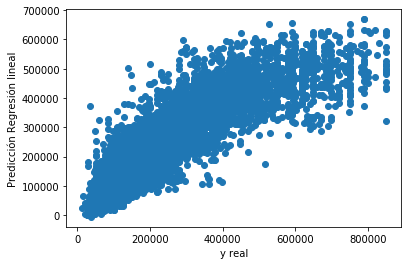

In [56]:
g = plt.scatter(y_real, mr_predict)
g.axes.set_xlabel('y real')
g.axes.set_ylabel('Predicción Regresión lineal')

SCATTER PLOT para x= valor real, y= valor predicho por Gradient Boosting

Text(0, 0.5, 'Predicción Gradient Boosting')

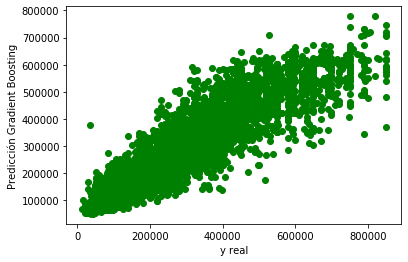

In [59]:
g = plt.scatter(y_real, mgb_predict, c='green')
g.axes.set_xlabel('y real')
g.axes.set_ylabel('Predicción Gradient Boosting')

**Conclusión**

En los scatter plot se ve la fuerte correlación entre los valores predichos vs el valor real. La correlación es más fuerte para el modelo entrenado con *Gradient Boosting*, pues los valores tienen una disperción más baja.
Además los valores predichos por *Regresión lineal* son un poco más pequeños.